**Welcome to my Final Project Game!**

The following is a luck-based story game, where what happens in the story is determined by rolling a dice. Low rolls means bad luck, high rolls means good luck!

At the end of the game you will be presented with a summary of your 'luck score"
which is the sum of all your rolls,
a CDF of all your rolls, and a normal distribution that shows how your luck compares to a sample. Enjoy!

You wake up in the middle of a forest, the sun its bright and there is no one around.
You dont remember how you got here, but you have the feeling that you better get
out of there before it gets dark.

You start walking, hoping to find any signs of where you are and where to go.
You look around but dont see a thing. Suddenly, you fall to the ground.
Looks like something made you trip, you look down to find... 

Type 'roll' to roll the dice:roll
You rolled:  2 

... A rusty bear trap. Your foot is caught in it, but it doesnt hurt.
On closer inspection you realize that the trap missed your foot by a hair, but your shoe is stuck.
You try to free your shoe from the bear trap but it wont budge, eventually you give up and leave your shoe behind.
You keep walking through the forest, now missing a shoe. 

You walk and walk and walk, hours pass but you dont see any signs of the forest ever ending.
All this walking has started to make you hungry, better find some food before it gets dark.
You lo

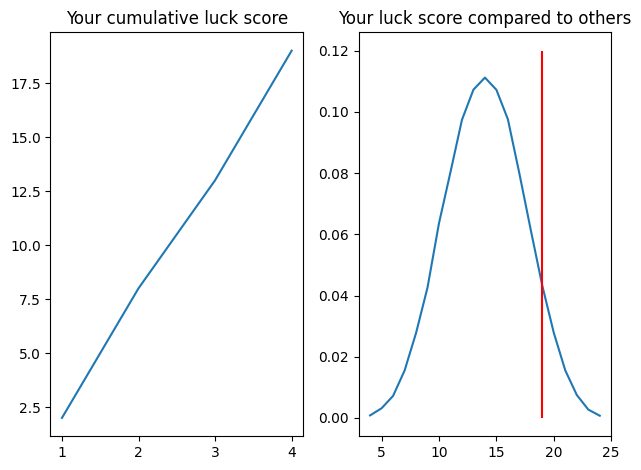

In [2]:
#@title Press Play To Start The Game

# ISC4221 - Final Project
# by: Andres Candido

import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt


#------------------------------------ Global variables ----------------------------------------

luck_matrix = []
luck_score = 0
luck_msg = ""

intro_msg = 'You wake up in the middle of a forest, the sun its bright and there is no one around.\nYou dont remember how you got here, but you have the feeling that you better get\nout of there before it gets dark.\n'
outro_msg = 'The end.'
scenario_matrix = ['You start walking, hoping to find any signs of where you are and where to go.\nYou look around but dont see a thing. Suddenly, you fall to the ground.\nLooks like something made you trip, you look down to find...',
                   'You walk and walk and walk, hours pass but you dont see any signs of the forest ever ending.\nAll this walking has started to make you hungry, better find some food before it gets dark.\nYou look around and see...',
                   'As you keep walking you see something in the distance, its some kind of structure.\nYou move in to take a closer look. Its a wooden cabin, it looks rundown but there could be something usefull inside.\nYou walk up to the porch and open the door...',
                   'The sun is starting to set in the horizon. As you walk out of the cabin you hear the sound of branches snapping.\nYou turn your head towards the origin of sound. Its an enormous creature, it looks like a bear but you cant tell exactly what it is.\nits about 20 meters away from you. You start to walk away slowly, but the crature sees you.\nIt lets out a loud growl and starts running towards you. You turn away from it and run as fast as you can...']

outcome_matrix = [ ['A rusty bear trap. Your foot is caught in it, but it doesnt hurt.\nOn closer inspection you realize that the trap missed your foot by a hair, but your shoe is stuck.\nYou try to free your shoe from the bear trap but it wont budge, eventually you give up and leave your shoe behind.\nYou keep walking through the forest, now missing a shoe.',
                    'A tree branch. You notice something moving next to it, its a baby bird.\nIt doesnt look hurt. You look up and see a nest on a low hanging branch. You take the bird and put it back in the nest.\nYour chances for survival arent any better, but you feel good about yourself for helping the little bird.',
                    'A cowboy hat. You pick it up and put it on your head, it fits very well.\nIt casts a big shadow that protects your head from the hot sun. You continue to walk, feeling confident that you can find your way out of this forest.'],

                   ['A berry bush. The berries look a bit strange. You try one, its sour.\nYou dont think too much about it and keep eating them. A few minutes pass and you start feeling sick, you feel nauseous and start to sweat profusely.\nLooks like the berries were poisonous. You vomit and start walking shortly after.\nYou will think twice before eating anything from the forest ever again.',
                    'A berry bush with a few berries on it. The berries look a ripe. You try one, its sweet.\nYou eat all the berries but find yourself still hungry. You look around to see if there are any more berries, but looks like your luck has run out.\nYou have no other choice but keep walking with a half-full belly.',
                    'A backpack hanging from a tree, it looks like its been there for a while.\nYou open the backpack and find a closed can of tuna and a full water bottle. You manage to open the can, the tuna is still good.\nYou eat the tuna and drink the water, you feel full and satisfied. You start walking again shortly after.'],

                   ['As soon as you open the door a group of bats comes flying at you.\nThey scratch your face and you fall on your back, you manage to scare them away and open your eyes to find an empty cabin.\nThere is nothing of use here. You feel disappointed and your face hurts.',
                    'You see many old clothes and other items around the cabin. Looks like someone used to live here.\nThere is a letter on a counter.\nIt reads:"Dear son, Im sorry for wronging you all those years ago. I hope you find it in your heart to forgive me someday.\nI wont be bothering you anymore. -Jonathan Corrie."\nYou feel that you are in a place where you shouldnt be.\nYou put down the letter and step out the cabin, closing the door behind you.',
                    'You see that the cabin is mostly empty, except for something hanging from the wall.\nIts a map. It shows the location of the cabin, you can see that there is a road a few miles North from it.\nYou memorize the map and step out of the cabin. Now you know where to go.'],

                   ['You hear the creature running behing you, its getting closer.\nYou run and run until your legs start to give out, you no longer hear anything behind you but you are too scared to turn around to check.\nYou quickly turn you head while you keep running. Looks like the creature gave up on you.\nSuddenly, everything goes dark and you fall to the ground. You just hit your head with a branch.\n\nYou wake up in the middle of a forest, the sun its bright and there is no one around.\nYou dont remember how you got here, but you have the feeling that you better get\nout of there before it gets dark.',
                    'You hear the creature running behing you, its getting closer.\nYou run and run until your legs start to give out, you can still hear the creature behind you.\nYou keep running until you find yourself in the middle of a road atop a hill, you look into the distance and see a town.\nYou start running towards it and turn around to see if the creature is still following you.\nIt standing a few meters away from you, you didnt realize it had gotten that close.\nThe creature sees that you are running towards the town, and it hestitates to follow you. The creature returns to the forest.\nYou managed to escape from the forest, but you have a bad feeling about what might await you in that town.',
                    'You hear the creature running behing you, its getting closer.\nYou run and run until your legs start to give out, you can still hear the creature behind you.\nYou keep running until you find yourself in the middle of a road, a car stops right in front of you almost running you over.\nIts a park ranger. He quickly open the door, lets you in, and speeds away from the creature.\nYou turn and see the creature stands on its hind legs and lets out a loud growl as the car moves away from it.\nThe ranger turns to you and says: "You are very lucky I found you there and then son, that was no bear."\nYou feel fortunate to have escaped from that forest.'] ]

#-----------------------------------------------------------------------------------------



#------------------------------------ Functions ------------------------------------------

def roll_dice():
  num = np.random.randint(1,7)        # generate random number from 1 to 6 (7 is excluded)
  return num

#-----------------------------------------------------------------------------------------


#------------------------------------ Game Body ------------------------------------------

#np.random.seed(1)    # set random number generator seed, useful for testing (turn it into comment if not needed)

print(intro_msg)

for i in range(len(outcome_matrix)):
  print(scenario_matrix[i],'\n')

  user_input = ''
  while user_input != 'roll':
    user_input = input("Type 'roll' to roll the dice:")

  roll = roll_dice()
  luck_matrix.append(roll)
  luck_score += roll
  if   roll == 1 or  roll == 2:
    outcome=0
  elif roll == 3 or  roll == 4:
    outcome=1
  elif roll == 5 or  roll == 6:
    outcome =2
  print("You rolled: ", roll,'\n')
  print('...',outcome_matrix[i][outcome],'\n')

if luck_score == 4:
  luck_msg = "Your luck was terrible, stay away from casinos!"
elif (luck_score > 4) and (luck_score < 10):
  luck_msg = "Your luck was bellow average!"
elif (luck_score >= 10) and (luck_score <= 18):
  luck_msg = "Your luck was average!"
elif (luck_score > 18) and (luck_score < 24):
  luck_msg = "Your luck was above average!"
elif luck_score == 24:
  luck_msg = "Your luck was excelent! Try buying a lottery ticket!"

print(outro_msg,'\n')
print("------------------------------------ Game Summary --------------------------------------\n\n", "Your luck score was:",luck_score," ",luck_msg,'\n')

#----------------------------------------------------------------------------------------


#------------------------------------ Game Summary --------------------------------------

dice = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
population_size = 100000

four= 0
five = 0
six = 0
seven = 0
eigth = 0
nine = 0
ten = 0
eleven = 0
twelve = 0
thriteen = 0
Fourteen = 0
Fifteen = 0
Sixteen = 0
Seventeen = 0
Eighteen = 0
Nineteen = 0
Twenty = 0
Twentyone = 0
Twentytwo = 0
Twentythree = 0
Twentyfour = 0

for i in range(population_size):
  result = 0

  for j in range(4):                     # loop 4 times since have 4 dice rolls in the game
    result = result + roll_dice()        # generate random numbers from 1 to 6 (7 is excluded)

  if result == 4:
      four +=1
  elif result == 5:
      five +=1
  elif result == 6:
      six +=1
  elif result == 7:
      seven +=1
  elif result == 8:
      eigth +=1
  elif result == 9:
      nine +=1
  elif result == 10:
      ten +=1
  elif result == 11:
      eleven +=1
  elif result == 12:
      twelve +=1
  elif result == 13:
      thriteen +=1
  elif result == 14:
      Fourteen +=1
  elif result == 15:
      Fifteen +=1
  elif result == 16:
      Sixteen +=1
  elif result == 17:
      Seventeen +=1
  elif result == 18:
      Eighteen +=1
  elif result == 19:
      Nineteen +=1
  elif result == 20:
      Twenty +=1
  elif result == 21:
      Twentyone +=1
  elif result == 22:
      Twentytwo +=1
  elif result == 23:
      Twentythree +=1
  elif result == 24:
      Twentyfour +=1

trial_result =[four,five,six,seven,eigth,nine,ten,eleven,twelve,thriteen,Fourteen,Fifteen,Sixteen,Seventeen,Eighteen,Nineteen,Twenty,Twentyone,Twentytwo,Twentythree,Twentyfour]

prob_trials =[]

for i in range(len(trial_result)):
  a = trial_result[i]/population_size
  prob_trials.append(a)


cdf = []
for i in range(len(luck_matrix)):
    cdf.append(0)
for i in range(len(luck_matrix)):
    if i == 0:
      cdf[i]=luck_matrix[i]
    else:
      cdf[i] = cdf[i-1]+luck_matrix[i]

plot1 = plt.subplot2grid((1, 4), (0, 0), colspan=2)
plot2 = plt.subplot2grid((1, 4), (0, 2), colspan=2)

plot1.plot([1,2,3,4],cdf)
plot1.set_title("Your cumulative luck score")

plot2.plot(dice,prob_trials)
plot2.vlines(luck_score,0,0.12,color='r')
plot2.set_title("Your luck score compared to others")

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()